235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step - loss: 0.3162 - val_loss: 0.1675
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


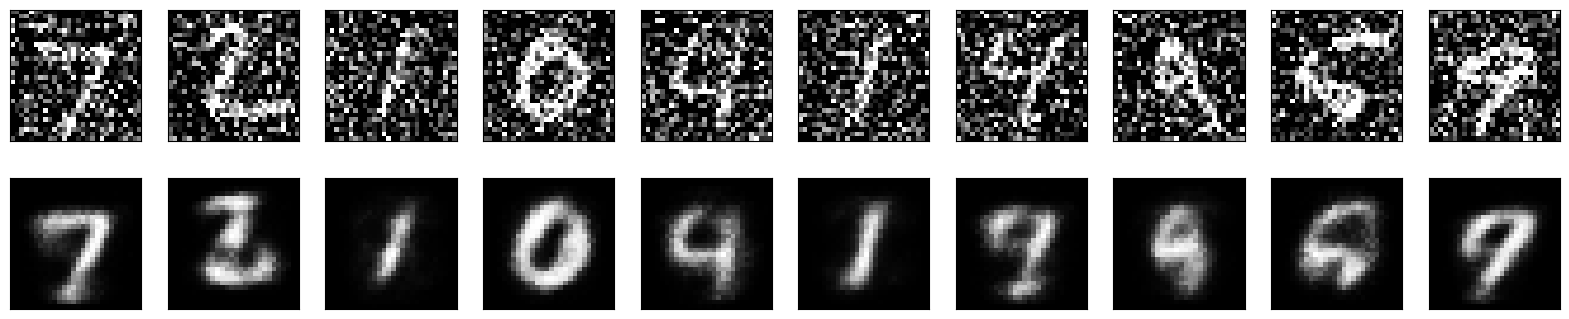

In [1]:
# Import libraries (same as previous)
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add noise to data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define denoising autoencoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Build and compile the model
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

# Train the model (input is noisy, but output is clean)
denoising_autoencoder.fit(x_train_noisy, x_train, epochs=1, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# Visualize the noisy and reconstructed images
encoded_imgs = denoising_autoencoder.predict(x_test_noisy)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy input
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
